
#1,set.sys

#2,读取数据
f, data/lin_reg2.csv
         x        y
195 -0.552  -52.960
196  1.852  183.505
197 -0.909  -88.254
198 -0.873  -85.407
199 -1.513 -147.368

#3,xed.train.数据

dnum, 200 120
type, <class 'numpy.ndarray'> <class 'numpy.ndarray'>
shape, (120,) (120,)

#4,model建立神经网络模型
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mlp01 (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

#5 模型训练 fit
Epoch 1/200
120/120 [==============================] - 0s - loss: 9834.7695 - acc: 0.0000e+00
Epoch 2/200
120/120 [==============================] - 0s - loss: 9446.6816 - acc: 0.0000e+00
Epoch 3/200
120/120 [==============================] - 0s - loss: 9073.9131 - acc: 0.0000e+00
Epoch 4/200
120/120 [==============================] - 0s - loss: 8715.8633 - acc: 0.0000e+00


120/120 [==============================] - 0s - loss: 429.1866 - acc: 0.0000e+00
Epoch 80/200
120/120 [==============================] - 0s - loss: 412.4186 - acc: 0.0000e+00
Epoch 81/200
120/120 [==============================] - 0s - loss: 396.3128 - acc: 0.0000e+00
Epoch 82/200
120/120 [==============================] - 0s - loss: 380.8428 - acc: 0.0000e+00
Epoch 83/200
120/120 [==============================] - 0s - loss: 365.9835 - acc: 0.0000e+00
Epoch 84/200
120/120 [==============================] - 0s - loss: 351.7107 - acc: 0.0000e+00
Epoch 85/200
120/120 [==============================] - 0s - loss: 338.0016 - acc: 0.0000e+00
Epoch 86/200
120/120 [==============================] - 0s - loss: 324.8335 - acc: 0.0000e+00
Epoch 87/200
120/120 [==============================] - 0s - loss: 312.1853 - acc: 0.0000e+00
Epoch 88/200
120/120 [==============================] - 0s - loss: 300.0364 - acc: 0.0000e+00
Epoch 89/200
120/120 [==============================] - 0s - loss: 288.36

120/120 [==============================] - 0s - loss: 17.2235 - acc: 0.0000e+00
Epoch 167/200
120/120 [==============================] - 0s - loss: 16.7193 - acc: 0.0000e+00
Epoch 168/200
120/120 [==============================] - 0s - loss: 16.2350 - acc: 0.0000e+00
Epoch 169/200
120/120 [==============================] - 0s - loss: 15.7698 - acc: 0.0000e+00
Epoch 170/200
120/120 [==============================] - 0s - loss: 15.3230 - acc: 0.0000e+00
Epoch 171/200
120/120 [==============================] - 0s - loss: 14.8939 - acc: 0.0000e+00
Epoch 172/200
120/120 [==============================] - 0s - loss: 14.4816 - acc: 0.0000e+00
Epoch 173/200
120/120 [==============================] - 0s - loss: 14.0857 - acc: 0.0000e+00
Epoch 174/200
120/120 [==============================] - 0s - loss: 13.7053 - acc: 0.0000e+00
Epoch 175/200
120/120 [==============================] - 0s - loss: 13.3400 - acc: 0.0000e+00
Epoch 176/200
120/120 [==============================] - 0s - loss: 12.989

/Users/bluegrey/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:107: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



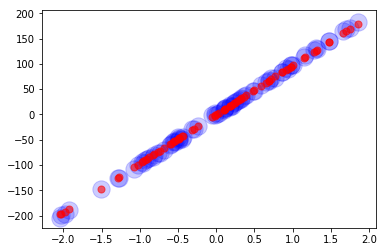

In [2]:
# -*- coding: utf-8 -*-
'''
TopQuant-简称TQ极宽智能量化回溯分析系统，培训课件-配套教学python课件程序

Top极宽量化(原zw量化)，Python量化第一品牌 
by Top极宽·量化开源团队 2017.10.1 首发

网站： www.TopQuant.vip      www.ziwang.com
QQ群: Top极宽量化1群，124134140
      Top极宽量化2群，650924099
      Top极宽量化3群，450853713
  
'''
#1
import os
import pandas as pd
import numpy as np
#2
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import RMSprop
from keras.utils import plot_model

#3
import tensorlayer as tl
import tensorflow as tf

#4
import zsys
import ztools as zt
import ztools_str as zstr
import ztools_data as zdat
import ztools_draw as zdr
import ztools_tq as ztq
import zpd_talib as zta
#
import zai_keras as zks

#

%matplotlib inline


#------------------


#------------------
 
#1
print('\n#1,set.sys')
pd.set_option('display.width', 450)    
pd.set_option('display.float_format', zt.xfloat3)    
rlog='ailib/log_tmp'
if os.path.exists(rlog):tf.gfile.DeleteRecursively(rlog)

#2
print('\n#2,读取数据')
fss='data/lin_reg2.csv'
df=pd.read_csv(fss)
print('f,',fss)
print(df.tail())
#
#3
print('\n#3,xed.train.数据')
dnum=len(df.index)
dnum2=round(dnum*0.6)
print('\ndnum,',dnum,dnum2)
df_train=df.head(dnum2)
df_test=df.tail(dnum-dnum2)
#
x_train,y_train=df_train['x'].values,df_train['y'].values
x_test, y_test = df_test['x'].values,df_test['y'].values
#print('train,',x_train[0],y_train[0])
print('type,',type(x_train),type(y_train))
print('shape,',x_train.shape,y_train.shape)

#4
print('\n#4,model建立神经网络模型')
model=zks.mlp01()
#
model.summary()
plot_model(model, to_file='tmp/model01.png')
plot_model(model, to_file='tmp/model02.png',show_shapes=True,show_layer_names=True)
#
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])    
#
#5 模型训练
print('\n#5 模型训练 fit')
#model.fit(x_train, y_train, epochs=200, batch_size=len(x_train))
model.fit(x_train, y_train, epochs=200, batch_size=128)
#
#6 利用模型进行预测 predict
print('\n#6 模型预测 predict')
y_pred = model.predict(x_test)
print(y_pred)
print('type(y_pred):',type(y_pred))

#7 整理预测数据 
print('\n#7 整理预测数据 ')
print('\n acc.xed')
y2x=y_pred.flatten()[:]
print('\n y2x');print(y2x)
print('type(y2x):',type(y2x))

ds2y=zdat.ds4x(y2x,df_test.index)
df_test['y_pred']=ds2y
print('\ndf_test')
print(df_test.tail(9))


print('\n acc.xed')
dacc,df2,a10=ztq.ai_acc_xed2ext(df_test.y,df_test.y_pred,ky0=5,fgDebug=True)
#
#
#8 draw
print('\n#8 绘制图形')
v1=[df_test.x,df_test.y,300,'blue',0.2]
v2=[df_test.x,df_test.y_pred,50,'red',0.6]
zdr.dr_mul_scatter(vlst=[v1,v2])

